# Introdução 

Pouco a pouca a ciência de dados infiltrou-se nas nossas atividades do dia-a-dia, tornando-se um domínio indispensável para a análise e processamento de grandes quantidades de informação.
Uma das principais áreas deste domínio é o supervised learning, em que o objetivo é fazer previsões partindo de uma base de casos de treino. Neste projeto iremos explorar um pouco esta área com a finalidade de prever a sobrevivência de pacientes um ano após o diagnóstico da doença HCC.

Esta pesquisa constitui um avanço na colaboração existente entre a inteligência artificial e a medicina no diagnóstico médico. As potencialidades deste ideia são vastas e poderão revolucionar não só os diagnósticos médicos como também a forma como encaramos a medicina atualmente.

# Bibliotecas Utilizadas

Recomenda-se a utilização da [Anaconda Python distribution](http://continuum.io/downloads) para a visualização deste projeto, dado que este permite o acesso às diversas bibliotecas Python utilizadas.

As principais bibliotecas utilizadas são:
* **NumPy**: Permite realizar uma grande variedade de operações matemáticas em matrizes.
* **Pandas**: Possibilita uma análize e manipulação de dados mais eficientemat. 
* **Scikit-learn:** Dispõe de ferramentas simples e eficientes para análise preditiva de dados.
* **Matplotlib:** Destina-se à criação de gráficos e à visualização de dados em geral
* **Seaborn:** Fornece uma interface de alto nível, tranalhando em simultâneo com o matplotlib.

In [1062]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score, roc_curve, roc_auc_score, auc, precision_score, f1_score, make_scorer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Formulação do Problema 

O objetivo deste trabalho é prever se um paciente irá sobreviver ou não, tendo por base os seus dados médicos. Estes dados, em alguns casos, encontram-se incompletos e como tal é necessário fazer uma dedução destes dados. No dataset encontram-se as seguintes informações sobre cada paciente:

Male/ Female: Gender 

YES/ NO:  Symptoms	Alcohol	HBsAg	HBeAg	HBcAb	HCVAb	Cirrhosis	Endemic	Smoking	Diabetes	Obesity	Hemochro	AHT	CRI	HIV	NASH	Varices	Spleno	PHT	PVT	Metastasis	Hallmark

Grades: Encephalopathy

Level of activeness: PS

Numericals: INR	AFP	Hemoglobin	MCV	Leucocytes	Platelets	 Albumin	Total_Bil	ALT	AST	GGT	ALP	TP	Creatinine	Nodules	Major_Dim	Dir_Bil	Iron	Sat	Ferritin

Level of intensity: Ascites

Lives/Dies: Class

Por se tratar de uma amostra destas dimensões com tantas variáveis, podemos determinar quais as mais relevantes para o prognóstico.

# Análise e Processamento dos Dados 

Nesta fase iremos tratar os dados, garantindo que todos são do mesmo tipo e que possuem um valor. Uma vez completa esta fase inicial poderemos determinar qual a relevância de cada categoria.

In [1063]:
#Load the dataset
data = pd.read_csv("hcc_dataset.csv")
print(data)

       Gender Symptoms       Alcohol HBsAg   HBeAg HBcAb HCVAb Cirrhosis  \
0    Male           No      Yes         No      No    No    No       Yes   
1      Female        ?            No    No      No    No   Yes       Yes   
2        Male       No           Yes   Yes      No   Yes    No       Yes   
3        Male      Yes           Yes    No      No    No    No       Yes   
4        Male      Yes           Yes   Yes      No   Yes    No       Yes   
..        ...      ...           ...   ...     ...   ...   ...       ...   
160    Female       No           Yes     ?       ?     ?   Yes       Yes   
161    Female      Yes            No     ?       ?     ?     ?       Yes   
162      Male       No           Yes    No      No    No    No       Yes   
163      Male       No           Yes   Yes      No   Yes   Yes       Yes   
164      Male      Yes           Yes    No      No    No   Yes       Yes   

    Endemic Smoking  ...  ALP   TP Creatinine Nodules Major_Dim Dir_Bil Iron  \
0      

Vamos converter os valores string e colocar as colunas nos tipos float64 e int64

In [1064]:
#Replace 'Yes' with 1 and 'No' with 0, 'Male' with 1 and 'Female' with 0 etc.
data.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Active': 0, 'Ambulatory': 1,'Restricted': 2,'Selfcare': 3,'Disabled': 4, 'Lives': 1, 'Dies': 0}, inplace=True)

data.replace({'Grade I/II': 1, 'Grade III/IV': 2, 'Mild': 1, 'Moderate/Severe': 2}, inplace=True)

data.fillna({'Encephalopathy':0}, inplace=True) #palavras None passam a ser O
data.fillna({'Ascites':0}, inplace=True) 

C:\Users\eduar\AppData\Local\Temp\ipykernel_8480\1233877655.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Active': 0, 'Ambulatory': 1,'Restricted': 2,'Selfcare': 3,'Disabled': 4, 'Lives': 1, 'Dies': 0}, inplace=True)


Averiguar a percentagem de dados em falta por coluna

In [1065]:
data.replace('?', np.nan, inplace=True) #substitui '?' por Nan
print(((165-data.count())/165)*100) #percentagem de valores nulos

Gender             0.000000
Symptoms          10.909091
Alcohol            0.000000
HBsAg             10.303030
HBeAg             23.636364
HBcAb             14.545455
HCVAb              5.454545
Cirrhosis          0.000000
Endemic           23.636364
Smoking           24.848485
Diabetes           1.818182
Obesity            6.060606
Hemochro          13.939394
AHT                1.818182
CRI                1.212121
HIV                8.484848
NASH              13.333333
Varices           31.515152
Spleno             9.090909
PHT                6.666667
PVT                1.818182
Metastasis         2.424242
Hallmark           1.212121
Age                0.000000
Grams_day         29.090909
Packs_year        32.121212
PS                 0.000000
Encephalopathy     0.606061
Ascites            1.212121
INR                2.424242
AFP                4.848485
Hemoglobin         1.818182
MCV                1.818182
Leucocytes         1.818182
Platelets          1.818182
 Albumin           3

C:\Users\eduar\AppData\Local\Temp\ipykernel_8480\3727793416.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True) #substitui '?' por Nan


In [1066]:
data = data.apply(pd.to_numeric, errors='coerce') #converter do tipo object para float64 para a máquina conseguir mexer
# Converter todas as colunas para float64
#data = data.astype(float)
print(data.dtypes)

Gender            float64
Symptoms          float64
Alcohol           float64
HBsAg             float64
HBeAg             float64
HBcAb             float64
HCVAb             float64
Cirrhosis           int64
Endemic           float64
Smoking           float64
Diabetes          float64
Obesity           float64
Hemochro          float64
AHT               float64
CRI               float64
HIV               float64
NASH              float64
Varices           float64
Spleno            float64
PHT               float64
PVT               float64
Metastasis        float64
Hallmark          float64
Age                 int64
Grams_day         float64
Packs_year        float64
PS                  int64
Encephalopathy    float64
Ascites           float64
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT               float64
AST         

Nem todas as informações recolhidas são estritamente necessárias, como tal, podemos realizar a sua remoção para melhorar a eficácia da pesquisa futuramente.

In [1067]:
null_percentages = (data.isnull().sum() / len(data)) * 100

# Selecionar colunas com menos de 20% de valores nulos
columns_to_remove = null_percentages[null_percentages > 20].index
print(columns_to_remove)


Index(['HBeAg', 'Endemic', 'Smoking', 'Varices', 'Grams_day', 'Packs_year',
       'Dir_Bil', 'Iron', 'Sat', 'Ferritin'],
      dtype='object')


Criamos novos datasets tanto pela remoção das colunas em que apresentam mais do que uma quinta parte de valores em falta como também pela substituição dos mesmos.

Substituição de '?' para valores não definidos(Nan)

In [1068]:
data.replace('?', pd.NA, inplace=True)

<font size="6">
Método Média e Moda

<font size="4">

Substituição dos valores em falta pela média e moda da coluna

In [1069]:
data_media_moda = data.copy()
#Média nos missing values das colunas com valores numéricos
for col in data_media_moda.columns[29:49]: #selecionar as colunas com números
    median = data_media_moda[col].median(skipna=True) #skip dos valores nulos para não serem incluídos na media
    data_media_moda.fillna({col:median},inplace=True)
for col in data_media_moda.columns[23:26]:
    median = data_media_moda[col].median(skipna=True)
    data_media_moda.fillna({col:median},inplace=True)

for col in data_media_moda.columns[0:23]:      #moda para as colunas de yes e no e semelhantes
    mode = data_media_moda[col].mode()
    data_media_moda.fillna({col:mode.iloc[0]},inplace=True)
    
for col in data_media_moda.columns[26:29]:
    mode = data_media_moda[col].mode()
    data_media_moda.fillna({col:mode.iloc[0]},inplace=True) 

print(data_media_moda)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0       1.0       0.0      1.0    0.0    0.0    0.0    0.0          1   
1       0.0       1.0      0.0    0.0    0.0    0.0    1.0          1   
2       1.0       0.0      1.0    1.0    0.0    1.0    0.0          1   
3       1.0       1.0      1.0    0.0    0.0    0.0    0.0          1   
4       1.0       1.0      1.0    1.0    0.0    1.0    0.0          1   
..      ...       ...      ...    ...    ...    ...    ...        ...   
160     0.0       0.0      1.0    0.0    0.0    0.0    1.0          1   
161     0.0       1.0      0.0    0.0    0.0    0.0    0.0          1   
162     1.0       0.0      1.0    0.0    0.0    0.0    0.0          1   
163     1.0       0.0      1.0    1.0    0.0    1.0    1.0          1   
164     1.0       1.0      1.0    0.0    0.0    0.0    1.0          1   

     Endemic  Smoking  ...    ALP    TP  Creatinine  Nodules  Major_Dim  \
0        0.0      1.0  ...  150.0  7.10        0

<font size="6">
Método KNNImputer

<font size="4">


O KNNImputer substituirá os valores fem falta com base nos valores dos pacientes com os dados mais próximos.

In [1070]:
data_knn = data.copy()

X = data_knn.drop(columns=['Class'])   # Remover a coluna alvo
y = data_knn['Class']  # Coluna alvo

# Imputar os dados usando KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Converter X_imputed de volta para um DataFrame e atribuir os nomes das colunas
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Substituir as colunas originais de 'data' pelas colunas imputadas
data_knn[X.columns] = X_imputed_df

data_missing_values = data_knn.drop(columns=columns_to_remove)

print(data_knn)


     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0       1.0       0.0      1.0    0.0    0.0    0.0    0.0        1.0   
1       0.0       0.2      0.0    0.0    0.0    0.0    1.0        1.0   
2       1.0       0.0      1.0    1.0    0.0    1.0    0.0        1.0   
3       1.0       1.0      1.0    0.0    0.0    0.0    0.0        1.0   
4       1.0       1.0      1.0    1.0    0.0    1.0    0.0        1.0   
..      ...       ...      ...    ...    ...    ...    ...        ...   
160     0.0       0.0      1.0    0.0    0.0    0.2    1.0        1.0   
161     0.0       1.0      0.0    0.2    0.0    0.4    0.2        1.0   
162     1.0       0.0      1.0    0.0    0.0    0.0    0.0        1.0   
163     1.0       0.0      1.0    1.0    0.0    1.0    1.0        1.0   
164     1.0       1.0      1.0    0.0    0.0    0.0    1.0        1.0   

     Endemic  Smoking  ...    ALP    TP  Creatinine  Nodules  Major_Dim  \
0        0.0      1.0  ...  150.0  7.10       0.

<font size="6">Matriz de correlação das variáveis

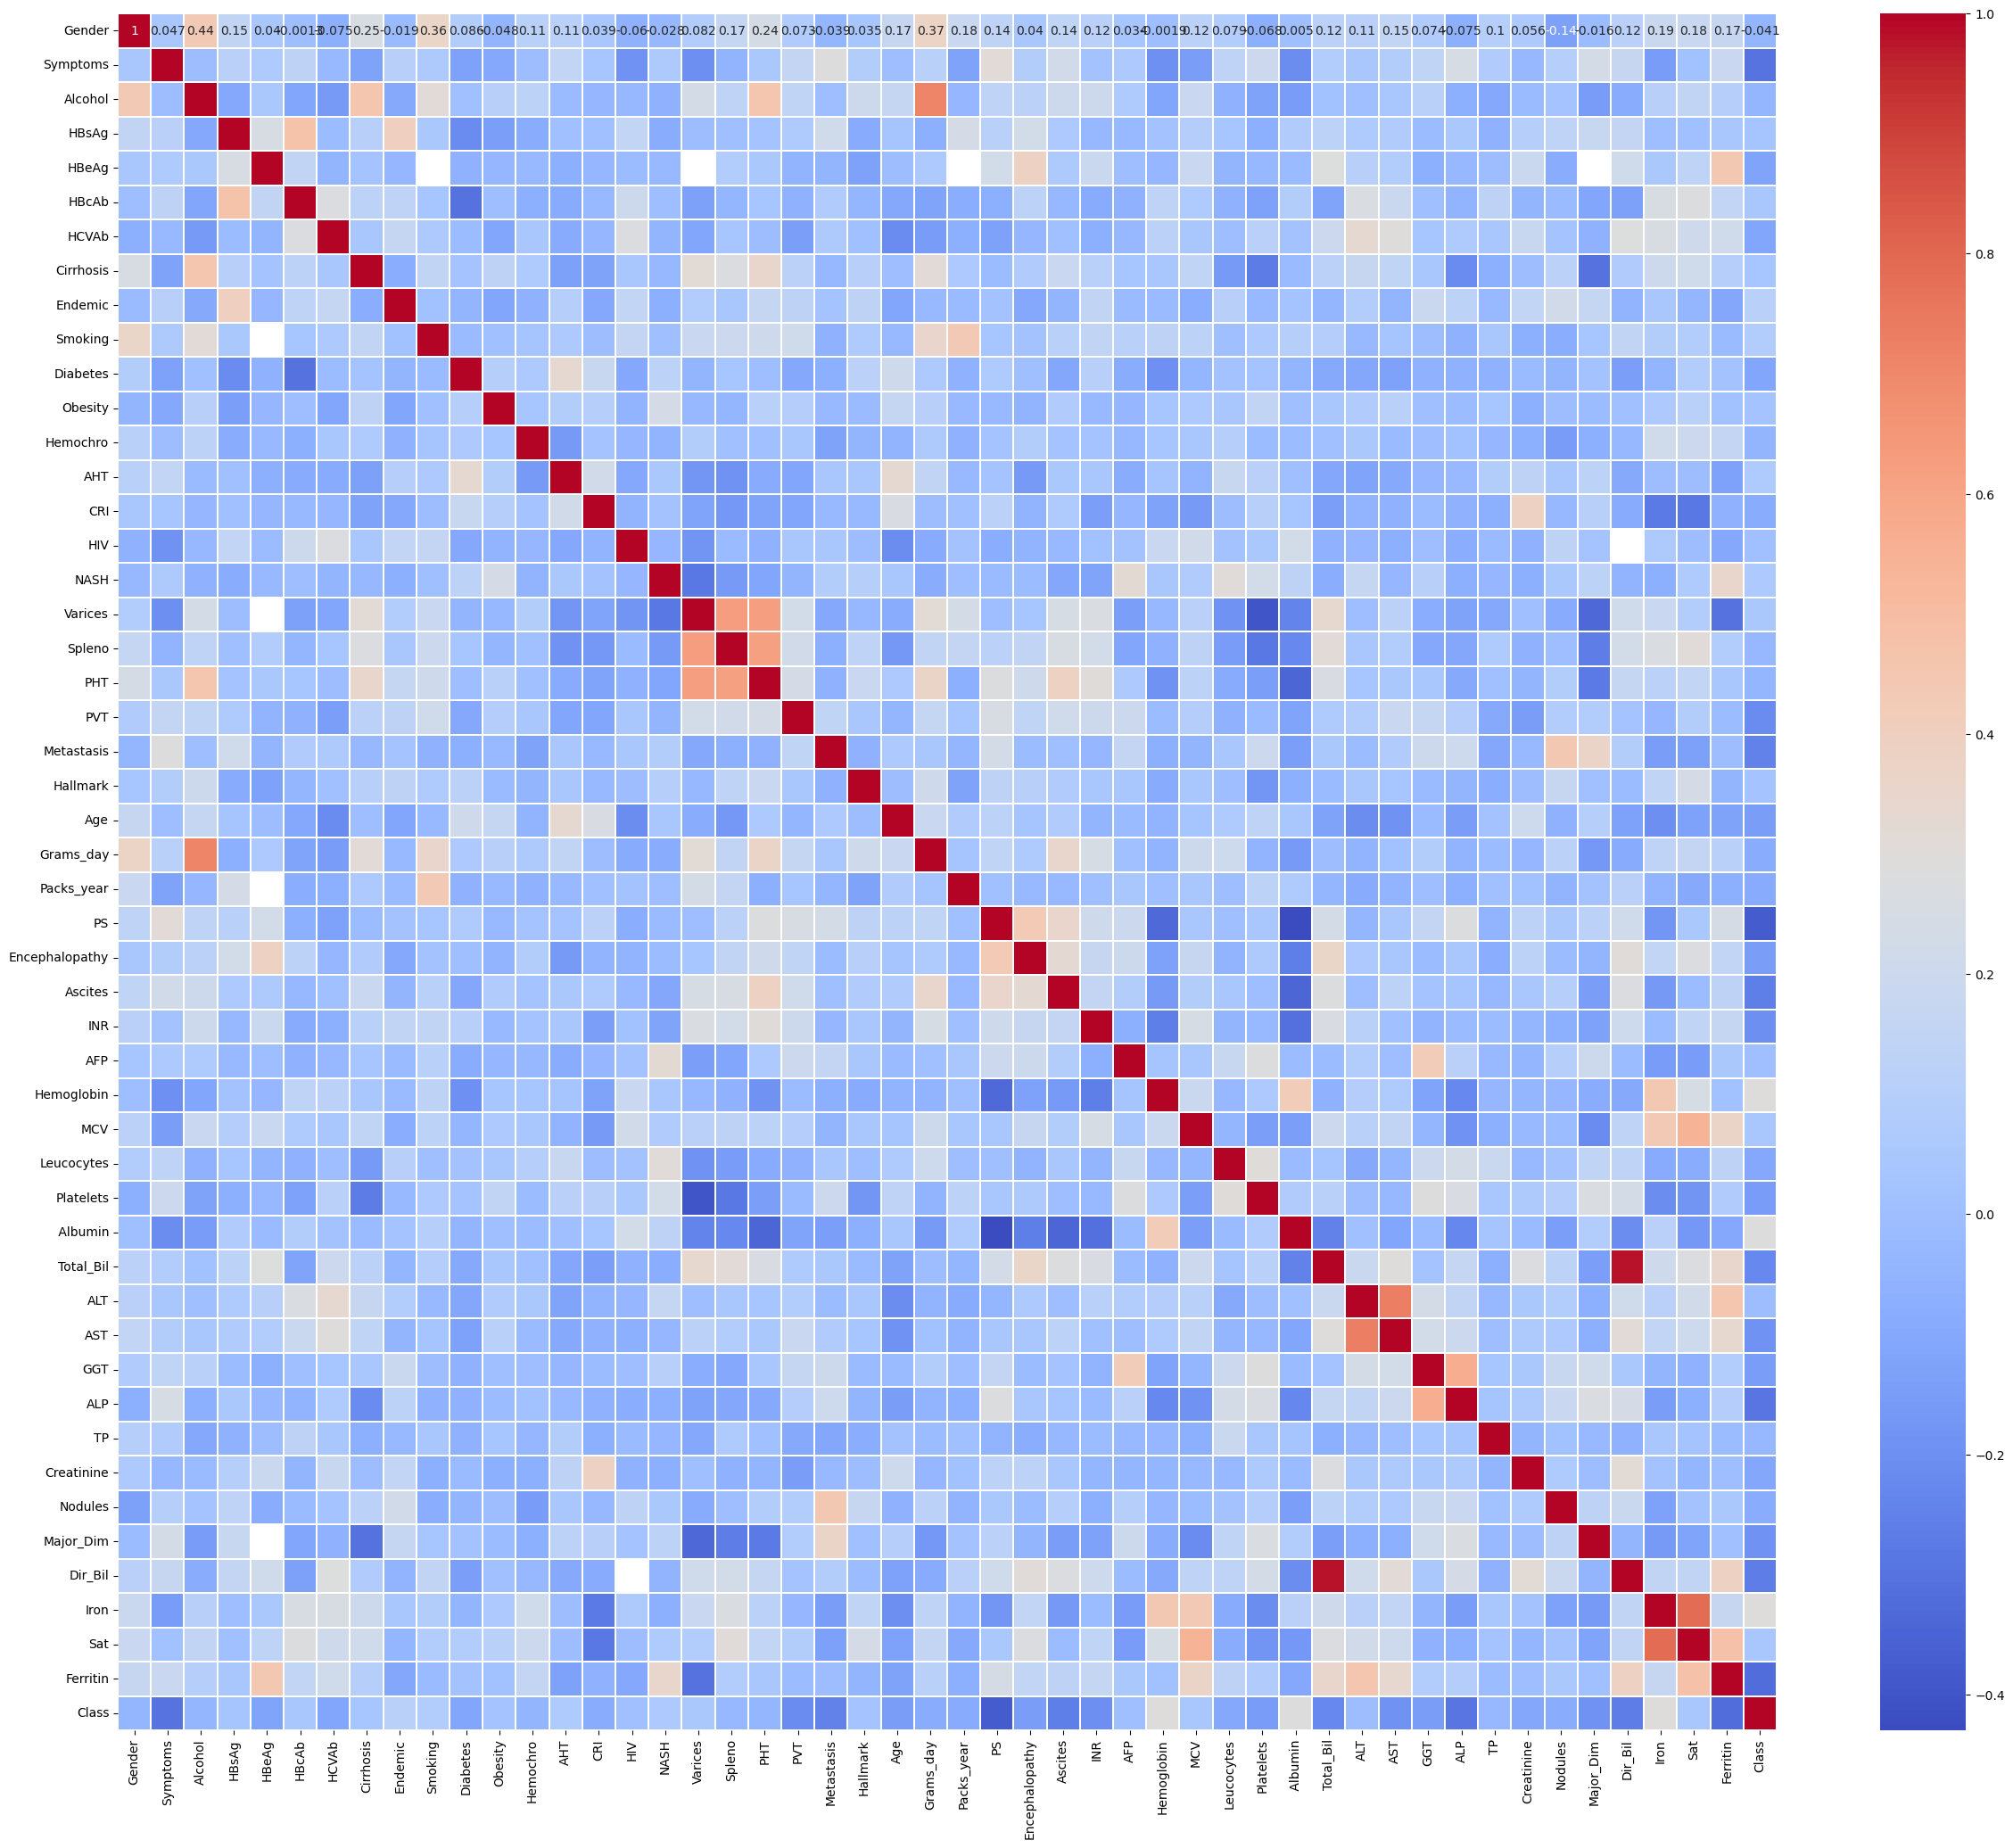

In [1071]:
# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.show()


Variáveis a destacar: Total_Bil e Dir_Bil, Iron e Sat e ALT e AST 

Esta informação será utilizada no Teste 3. Eliminaremos uma das variáveis de cada um destes pares de variáveis.

<font size="6">**Supervised Learning**

<font size="6">Teste 1

<font size="4">Testar qual dos métodos de substituição dos missing values tem melhor performance

<font size="5">**Método da média e moda**

<font size="5">Data and training sets

In [1072]:
# Selecting the features and the label
X = data_media_moda.drop('Class', axis=1)  # Features
y = data_media_moda['Class']  # Label

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<font size="5">Decision Tree 

In [1073]:
#cria o modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

#Treina o modelo
tree.fit(X_train, y_train)

# Testa o modelo, faz as previsões
y_pred = tree.predict(X_test)

media_tree_recall= recall_score(y_test, y_pred, average='weighted')
media_tree_f1 = f1_score(y_test, y_pred, average='weighted')
media_tree_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
media_accuracy_tree = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
media_conf_matrix_tree = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = tree.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
media_fpr_tree, media_tpr_tree, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
media_roc_auc_tree = auc(media_fpr_tree, media_tpr_tree)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        22
           1       0.69      0.64      0.67        28

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



<font size="5">KNN

In [1074]:
# Convertendo para NumPy Arrays explicitamente
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Cria o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  # Exemplo com k=5, você pode ajustar conforme necessário

# Treina o modelo
knn.fit(X_train, y_train)

# Faz previsões
y_pred = knn.predict(X_test)

media_knn_recall= recall_score(y_test, y_pred, average='weighted')
media_knn_f1 = f1_score(y_test, y_pred, average='weighted')
media_knn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
media_accuracy_knn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
media_conf_matrix_knn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
media_fpr_knn, media_tpr_knn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
media_roc_auc_knn = auc(media_fpr_knn, media_tpr_knn)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.62      0.36      0.46        22
           1       0.62      0.82      0.71        28

    accuracy                           0.62        50
   macro avg       0.62      0.59      0.58        50
weighted avg       0.62      0.62      0.60        50



<font size="5">Neural Networks

In [1075]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

media_nn_recall= recall_score(y_test, y_pred, average='weighted')
media_nn_f1 = f1_score(y_test, y_pred, average='weighted')
media_nn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
media_accuracy_nn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
media_conf_matrix_nn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = mlp.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
media_fpr_nn, media_tpr_nn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
media_roc_auc_nn = auc(media_fpr_nn, media_tpr_nn)
report_nn = classification_report(y_test, y_pred)
print(report_nn)

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.68      0.82      0.74        28

    accuracy                           0.68        50
   macro avg       0.68      0.66      0.66        50
weighted avg       0.68      0.68      0.67        50



<font size="5">**Método KNNimputer**

<font size="5">Data and training sets

In [1076]:
# Selecting the features and the label
X = data_knn.drop('Class', axis=1)  # Features
y = data_knn['Class']  # Label

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<font size="5">Decision Tree

In [1077]:
#Cria o modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

#Treina o modelo
tree.fit(X_train, y_train)

# Testing the classifier, faz as previsões
y_pred = tree.predict(X_test)

knn_tree_recall= recall_score(y_test, y_pred, average='weighted')
knn_tree_f1 = f1_score(y_test, y_pred, average='weighted')
knn_tree_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
knn_accuracy_tree = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
knn_conf_matrix_tree = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = tree.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
knn_fpr_tree, knn_tpr_tree, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
knn_roc_auc_tree = auc(knn_fpr_tree, knn_tpr_tree)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        22
           1       0.70      0.50      0.58        28

    accuracy                           0.60        50
   macro avg       0.62      0.61      0.60        50
weighted avg       0.63      0.60      0.60        50



<font size="5">KNN

In [1078]:
# Convertendo para NumPy Arrays explicitamente
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Cria o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  # Exemplo com k=5, você pode ajustar conforme necessário

# Treina o modelo
knn.fit(X_train, y_train)

# Faz previsões
y_pred = knn.predict(X_test)

knn_knn_recall= recall_score(y_test, y_pred, average='weighted')
knn_knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_knn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
knn_accuracy_knn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
knn_conf_matrix_knn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
knn_fpr_knn, knn_tpr_knn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
knn_roc_auc_knn = auc(knn_fpr_knn, knn_tpr_knn)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        22
           1       0.61      0.79      0.69        28

    accuracy                           0.60        50
   macro avg       0.59      0.57      0.57        50
weighted avg       0.59      0.60      0.58        50



<font size="5">Neural Networks

In [1079]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
# Fazer previsões
y_pred = mlp.predict(X_test)

knn_nn_recall= recall_score(y_test, y_pred, average='weighted')
knn_nn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_nn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
knn_accuracy_nn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
knn_conf_matrix_nn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = mlp.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
knn_fpr_nn, knn_tpr_nn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
knn_roc_auc_nn = auc(knn_fpr_nn, knn_tpr_nn)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        22
           1       0.69      0.79      0.73        28

    accuracy                           0.68        50
   macro avg       0.68      0.67      0.67        50
weighted avg       0.68      0.68      0.67        50



<font size="5">Comparação dos resultados 

                                                       SUBSTITUIÇÃO DOS VALORES EM FALTA

                       MÉTODO DA MÉDIA E MODA                                                             MÉTODO KNN IMPUTER


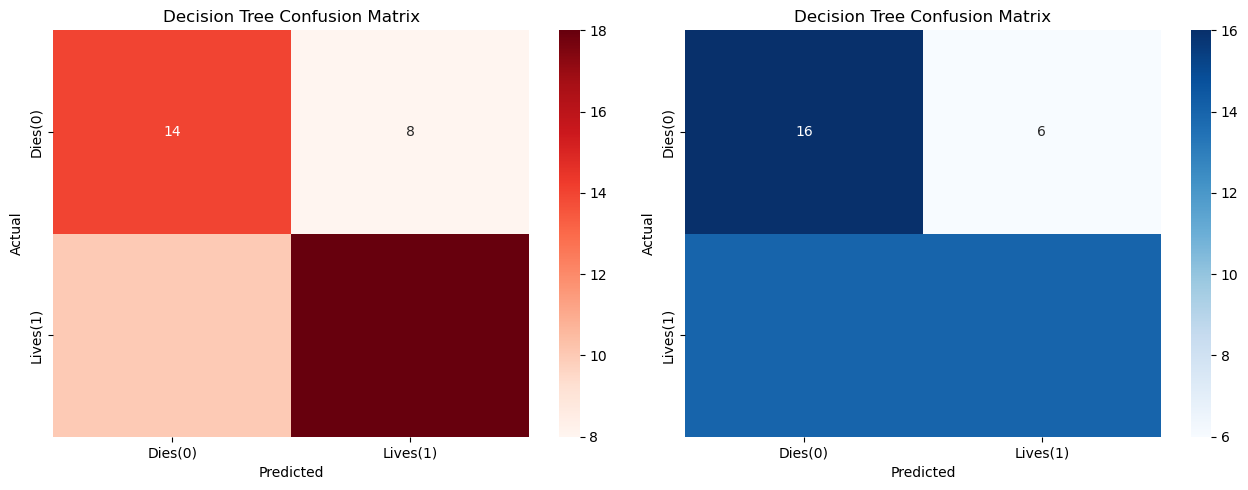

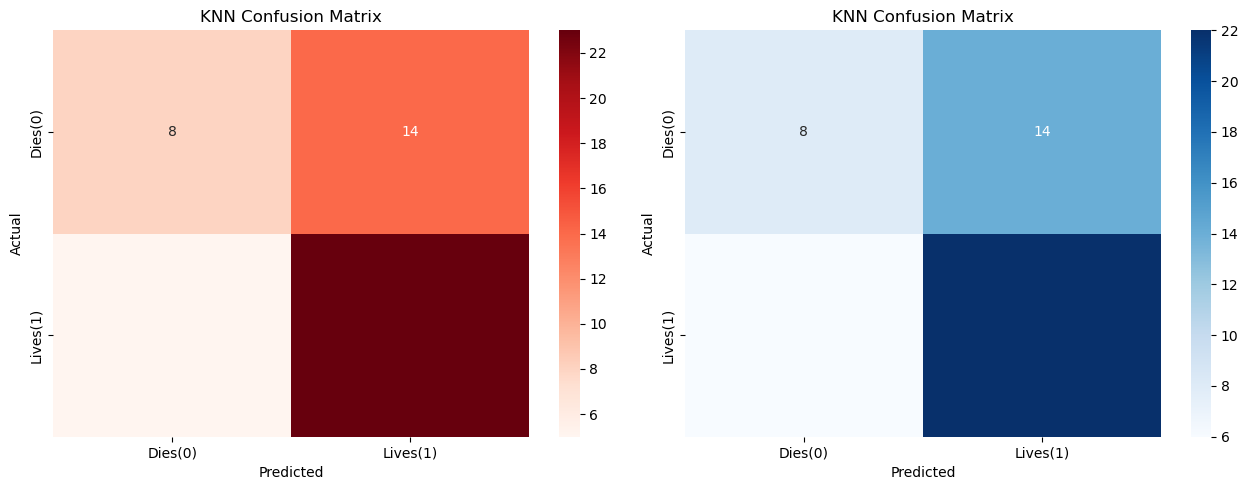

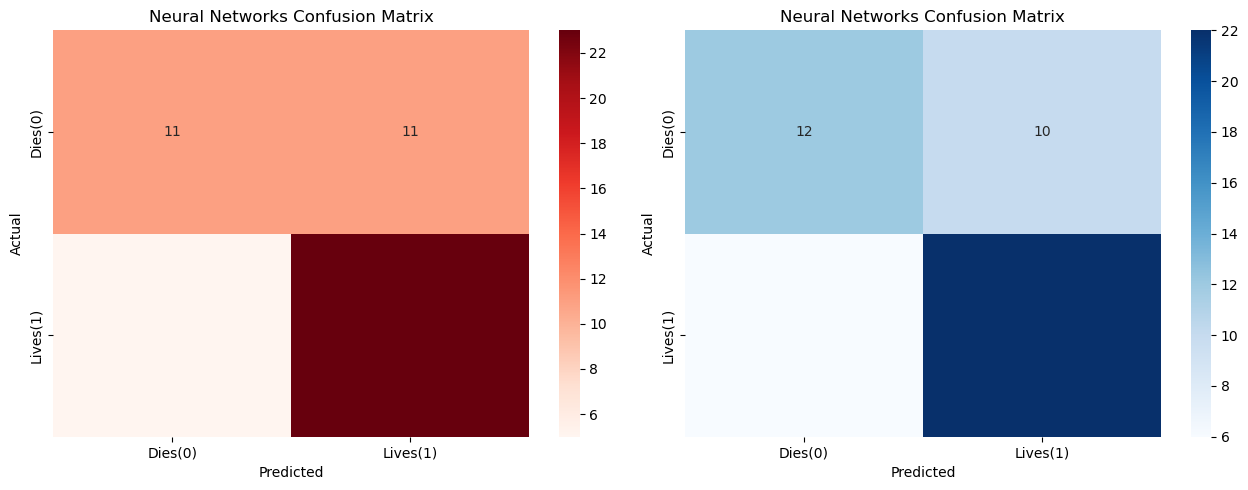

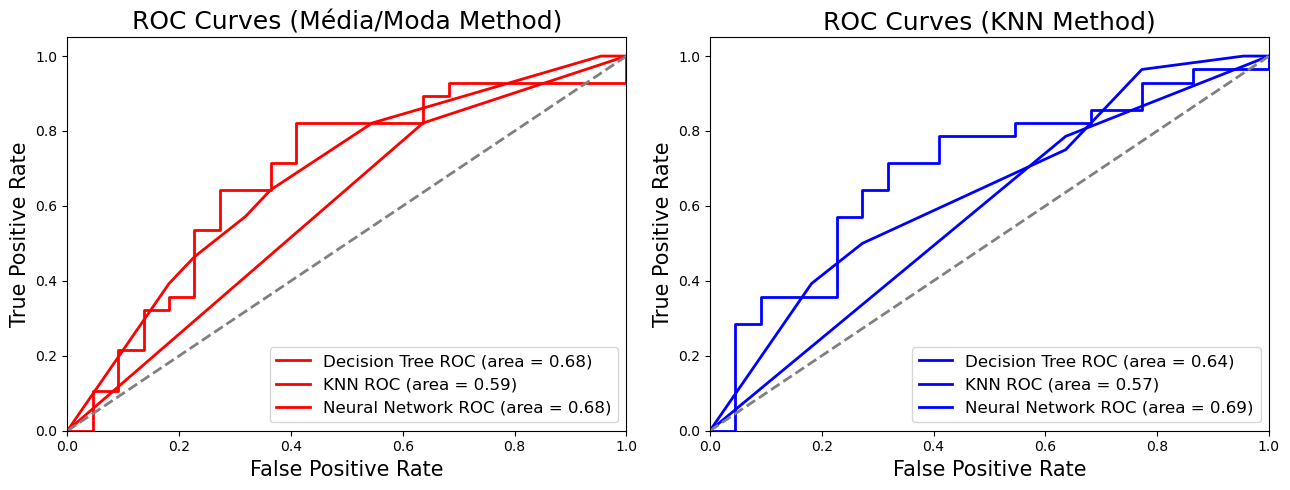

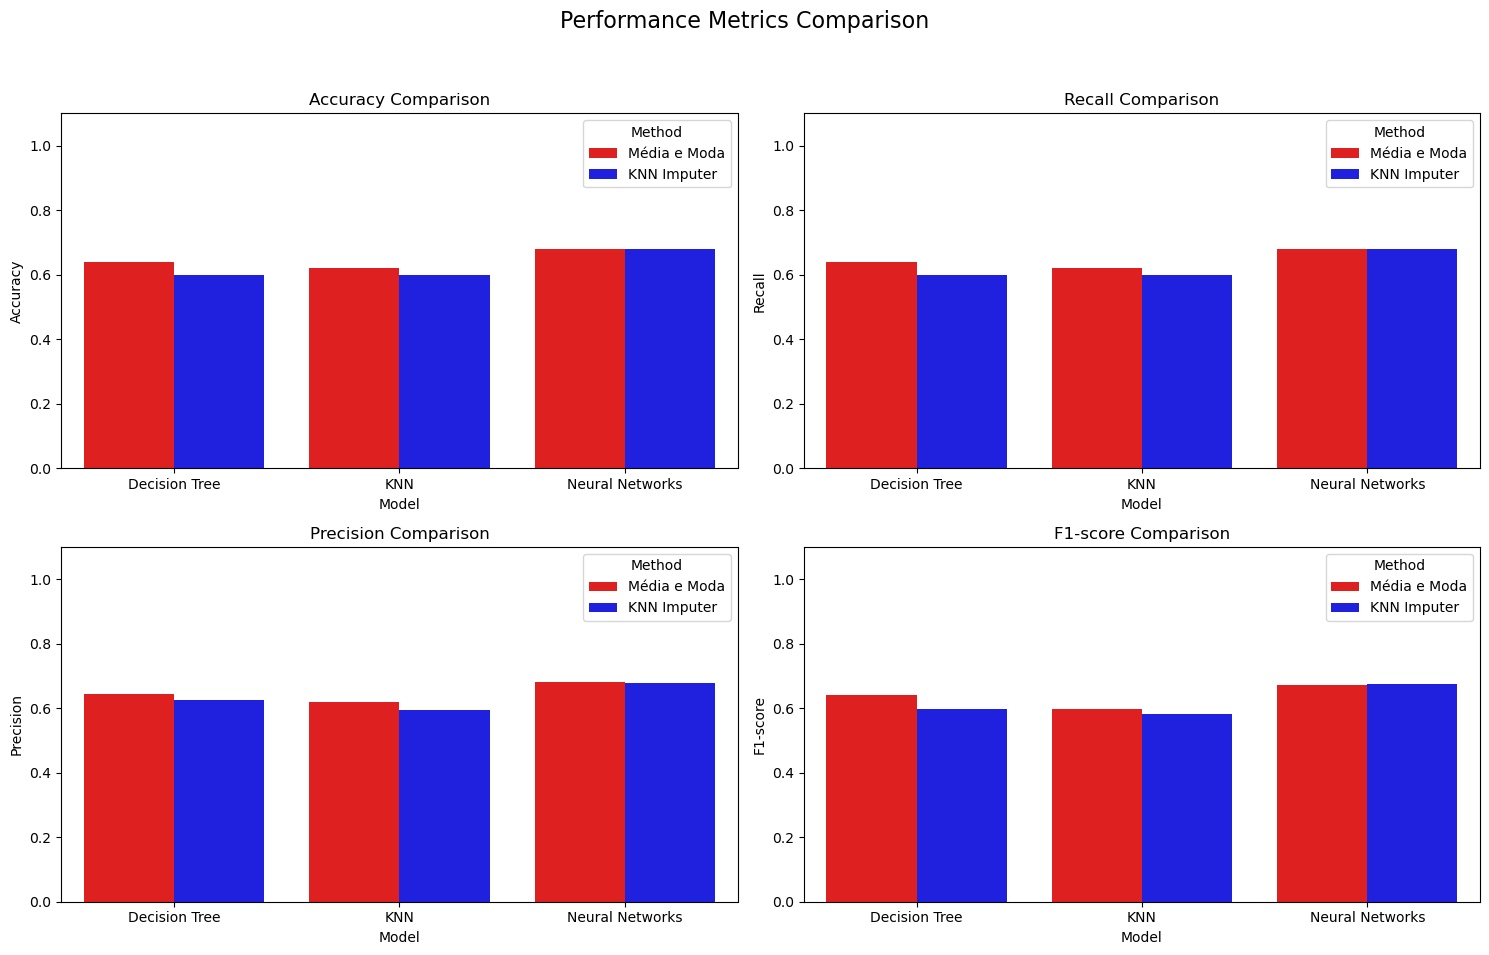

In [1080]:
print('                                                       SUBSTITUIÇÃO DOS VALORES EM FALTA')
print()
print('                       MÉTODO DA MÉDIA E MODA                                                             MÉTODO KNN IMPUTER')
def plot_confusion_matrices(conf_matrix1, conf_matrix2, title1, title2, cmap1, cmap2, xticks, yticks):
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    sb.heatmap(conf_matrix1, annot=True, fmt='d', cmap=cmap1, ax=axes[0], xticklabels=xticks, yticklabels=yticks)
    axes[0].set_title(title1)
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    sb.heatmap(conf_matrix2, annot=True, fmt='d', cmap=cmap2, ax=axes[1], xticklabels=xticks, yticklabels=yticks)
    axes[1].set_title(title2)
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

xticks = ['Dies(0)', 'Lives(1)']
yticks = ['Dies(0)', 'Lives(1)']
plot_confusion_matrices(media_conf_matrix_tree, knn_conf_matrix_tree, 'Decision Tree Confusion Matrix', 'Decision Tree Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(media_conf_matrix_knn, knn_conf_matrix_knn, 'KNN Confusion Matrix', 'KNN Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(media_conf_matrix_nn, knn_conf_matrix_nn, 'Neural Networks Confusion Matrix', 'Neural Networks Confusion Matrix', 'Reds', 'Blues', xticks, yticks)

def plot_roc_curve(ax, fpr, tpr, roc_auc, title, color):
    ax.plot(fpr['tree'], tpr['tree'], color=color, lw=2, label=f'Decision Tree ROC (area = {roc_auc["tree"]:.2f})')
    ax.plot(fpr['knn'], tpr['knn'], color=color, lw=2, label=f'KNN ROC (area = {roc_auc["knn"]:.2f})')
    ax.plot(fpr['nn'], tpr['nn'], color=color, lw=2, label=f'Neural Network ROC (area = {roc_auc["nn"]:.2f})')
    ax.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=15)
    ax.set_ylabel('True Positive Rate', fontsize=15)
    ax.set_title(title, fontsize=18)
    ax.legend(loc="lower right", fontsize=12)

media_fpr = {'tree': media_fpr_tree, 'knn': media_fpr_knn, 'nn': media_fpr_nn}
media_tpr = {'tree': media_tpr_tree, 'knn': media_tpr_knn, 'nn': media_tpr_nn}
media_roc_auc = {'tree': media_roc_auc_tree, 'knn': media_roc_auc_knn, 'nn': media_roc_auc_nn}

knn_fpr = {'tree': knn_fpr_tree, 'knn': knn_fpr_knn, 'nn': knn_fpr_nn}
knn_tpr = {'tree': knn_tpr_tree, 'knn': knn_tpr_knn, 'nn': knn_tpr_nn}
knn_roc_auc = {'tree': knn_roc_auc_tree, 'knn': knn_roc_auc_knn, 'nn': knn_roc_auc_nn}

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot_roc_curve(axes[0], media_fpr, media_tpr, media_roc_auc, 'ROC Curves (Média/Moda Method)', 'red')
plot_roc_curve(axes[1], knn_fpr, knn_tpr, knn_roc_auc, 'ROC Curves (KNN Method)', 'blue')
plt.tight_layout()
plt.show()

# Métricas de accuracy, recall, precision e F1-score para cada modelo e método
metrics = {
    'Model': ['Decision Tree', 'Decision Tree', 'KNN', 'KNN', 'Neural Networks', 'Neural Networks'],
    'Method': ['Média e Moda', 'KNN Imputer', 'Média e Moda', 'KNN Imputer', 'Média e Moda', 'KNN Imputer'],
    'Class': [0, 1, 0, 1, 0, 1],
    'Accuracy': [media_accuracy_tree,knn_accuracy_tree,media_accuracy_knn,knn_accuracy_knn,media_accuracy_nn,knn_accuracy_nn],
    'Recall': [media_tree_recall, knn_tree_recall,media_knn_recall,knn_knn_recall, media_nn_recall, knn_nn_recall],
    'Precision': [media_tree_precision,knn_tree_precision, media_knn_precision,knn_knn_precision, media_nn_precision, knn_nn_precision],
    'F1-score': [media_tree_f1,knn_tree_f1, media_knn_f1,knn_knn_f1,media_nn_f1,knn_nn_f1]
}
df_metrics = pd.DataFrame(metrics)
palette = {'Média e Moda': 'red', 'KNN Imputer': 'blue'}
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Metrics Comparison', fontsize=16)

metrics_list = ['Accuracy', 'Recall', 'Precision', 'F1-score']
titles = ['Accuracy Comparison', 'Recall Comparison', 'Precision Comparison', 'F1-score Comparison']
for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, hue='Method', data=df_metrics, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(titles[i])
    axes[i//2, i%2].set_ylim([0, 1.1])
    axes[i//2, i%2].set_ylabel(metric)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

O modelo Neural Networks apresenta os valores mais elevados de accuracy, recall, precision e F1-score, no entanto, a diferença entre esses valores e os obtidos pelos modelos Decision Tree e KNN não é extraordinária. Para além disso, como pode ser visualizado através das matrizes de confusão a Decision Tree é o que apresenta o menor número de Falsos Positivos. Consideramos este critério extremamente importante daí que a Decision Tree neste teste foi o melhor modelo. 
Concluímos que os modelos apresentam uma maior accuracy, precision, recall e F1-score nos resultados ao usar os dados em que os valores em falta foram substituídos pela média e pela moda, porém, menos Falsos Positivos, através da técnica de substituição KNN imputer, logo, a partir daqui usaremos o dataset nesse estado.

<font size="6">Teste 2 
<font size="4">


Testar sem as colunas que apresentam valores em falta

<font size="5">Data and training sets

In [1081]:
# Selecting the features and the label
X = data_missing_values.drop('Class', axis=1)  # Features
y = data_missing_values['Class']  # Label

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<font size="5">Decision Tree

In [1082]:
#cria o modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

#Treina o modelo
tree.fit(X_train, y_train)

# Testa o modelo, faz as previsões
y_pred = tree.predict(X_test)

tree_recall= recall_score(y_test, y_pred, average='weighted')
tree_f1 = f1_score(y_test, y_pred, average='weighted')
tree_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_tree = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = tree.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
media_roc_auc_tree = auc(fpr_tree, tpr_tree)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        22
           1       0.69      0.64      0.67        28

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



<font size="5">KNN

In [1083]:
# Convertendo para NumPy Arrays explicitamente
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
y_test = np.ascontiguousarray(y_test)

# Cria o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  # Exemplo com k=5, você pode ajustar conforme necessário

# Treina o modelo
knn.fit(X_train, y_train)

# Faz previsões
y_pred = knn.predict(X_test)

knn_recall= recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.60      0.41      0.49        22
           1       0.63      0.79      0.70        28

    accuracy                           0.62        50
   macro avg       0.61      0.60      0.59        50
weighted avg       0.62      0.62      0.61        50



<font size="5">Neural Networks

In [1084]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

nn_recall= recall_score(y_test, y_pred, average='weighted')
nn_f1 = f1_score(y_test, y_pred, average='weighted')
nn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
media_conf_matrix_nn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = mlp.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_nn, tpr_nn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_nn = auc(fpr_nn, tpr_nn)
report_nn = classification_report(y_test, y_pred)
print(report_nn)

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.71      0.86      0.77        28

    accuracy                           0.72        50
   macro avg       0.73      0.70      0.70        50
weighted avg       0.73      0.72      0.71        50



<font size="5">Comparação dos resultados

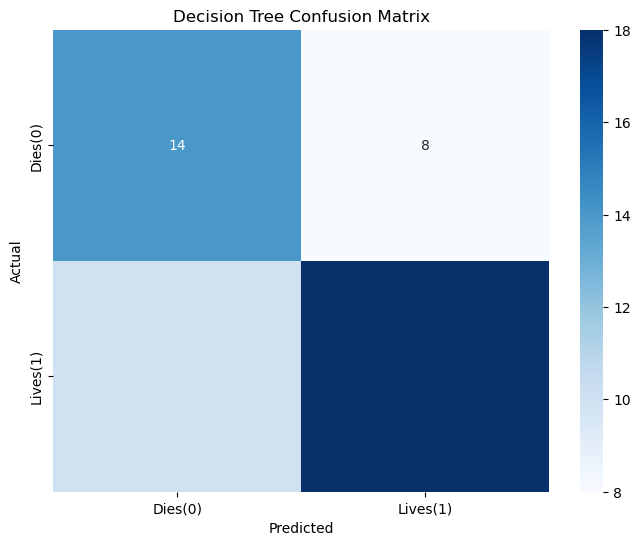

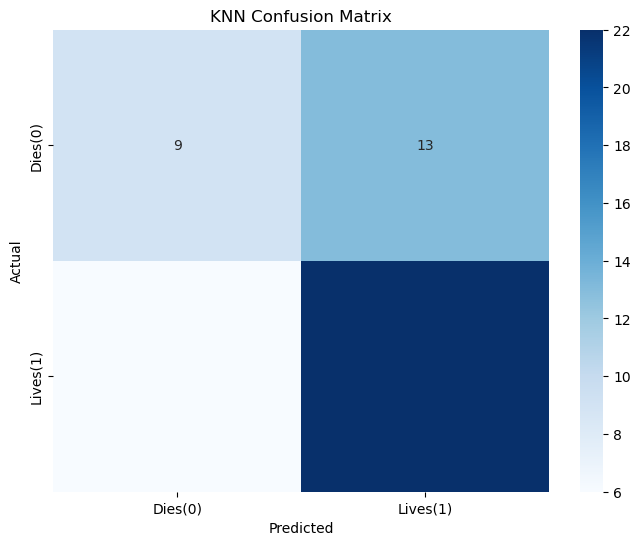

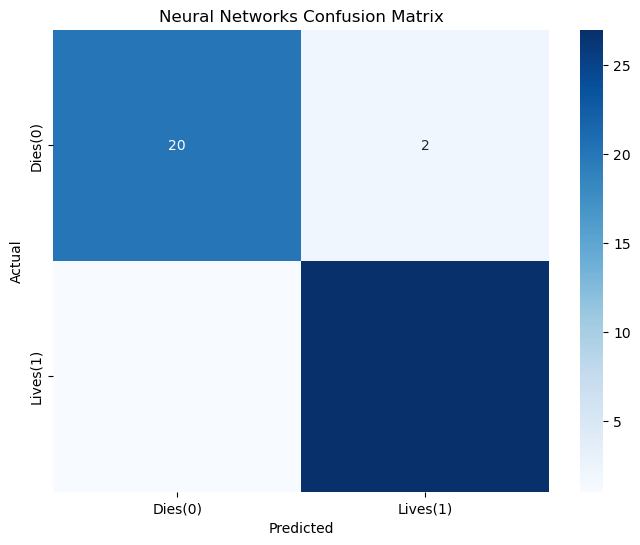

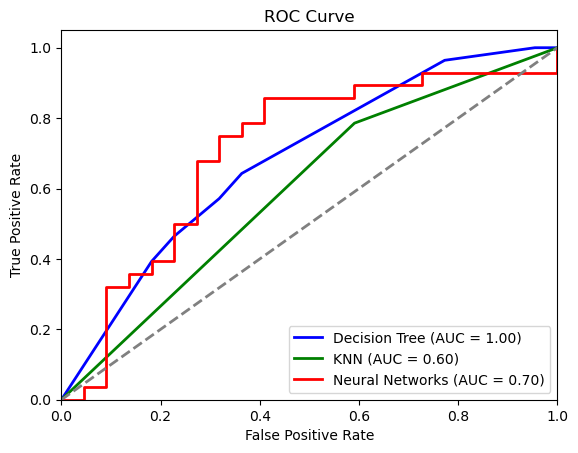

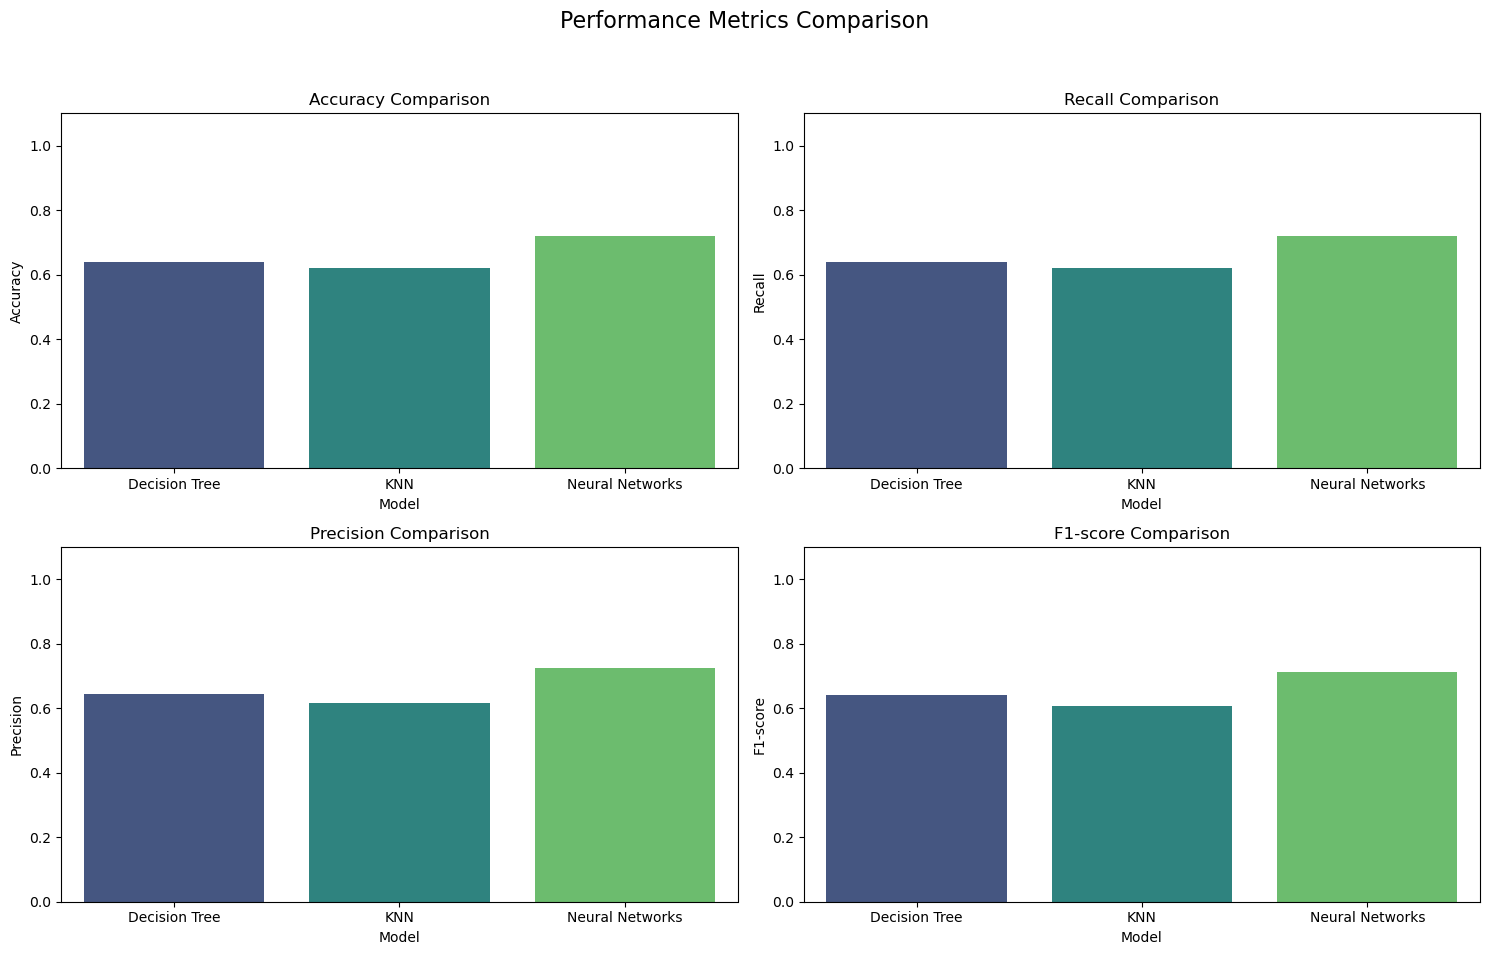

In [1085]:
labels = ['Dies(0)', 'Lives(1)']
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plotando as matrizes de confusão para os três modelos
plot_confusion_matrix(conf_matrix_tree, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(conf_matrix_knn, 'KNN Confusion Matrix')
plot_confusion_matrix(conf_matrix_nn, 'Neural Networks Confusion Matrix')
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Networks (AUC = %0.2f)' % roc_auc_nn)
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
metrics = {
    'Model': ['Decision Tree', 'KNN', 'Neural Networks'],
    'Accuracy': [accuracy_tree, accuracy_knn, accuracy_nn],
    'Recall': [tree_recall, knn_recall, nn_recall],
    'Precision': [tree_precision, knn_precision, nn_precision],
    'F1-score': [tree_f1, knn_f1, nn_f1]
}

df_metrics = pd.DataFrame(metrics)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Metrics Comparison', fontsize=16)

metrics_list = ['Accuracy', 'Recall', 'Precision', 'F1-score']
titles = ['Accuracy Comparison', 'Recall Comparison', 'Precision Comparison', 'F1-score Comparison']

for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, data=df_metrics, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(titles[i])
    axes[i//2, i%2].set_ylim([0, 1.1])
    axes[i//2, i%2].set_ylabel(metric)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

O modelo Neural Networks teve a melhor performance em comparação com os outros.

<font size="5">Importância das variáveis

ALP               0.073380
Hemoglobin        0.056775
AFP               0.056469
Iron              0.048198
Ferritin          0.044510
 Albumin          0.041223
INR               0.040670
AST               0.039366
Age               0.038735
PS                0.036387
Creatinine        0.034692
Platelets         0.032990
Total_Bil         0.031904
Sat               0.029856
Leucocytes        0.029739
Major_Dim         0.029294
MCV               0.029083
TP                0.028764
Symptoms          0.027448
GGT               0.026744
Dir_Bil           0.024897
Packs_year        0.023003
ALT               0.018257
Ascites           0.015798
Grams_day         0.015657
Varices           0.015613
Metastasis        0.014182
HCVAb             0.012056
Nodules           0.008912
Endemic           0.007805
HBcAb             0.007572
PVT               0.007104
Smoking           0.006787
PHT               0.005413
Hallmark          0.005109
Alcohol           0.004169
AHT               0.004134
D

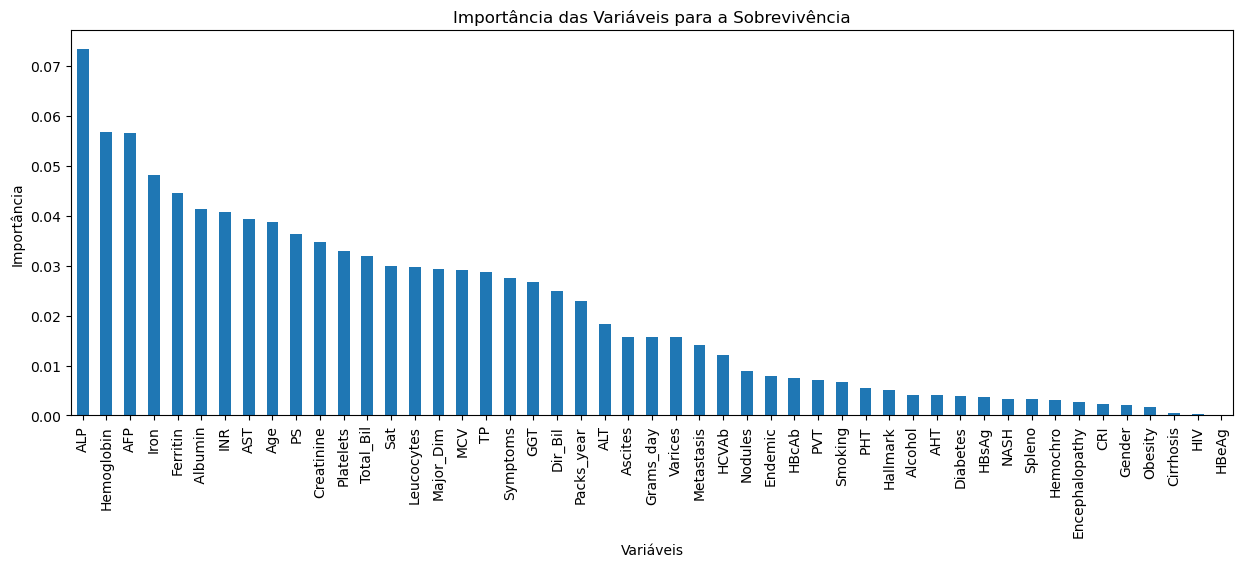

In [1086]:
# Selecionar variáveis independentes e dependentes
X = data_knn.drop(columns=['Class'])  
y = data_knn['Class']

# Ajustar o modelo de classificação
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obter a importância das variáveis
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Visualizar a importância das variáveis
plt.figure(figsize=(15, 5))
feature_importances.plot(kind='bar')
plt.title('Importância das Variáveis para a Sobrevivência')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.show()

Consideramos as variavéis de menor importância aquelas com valores inferiores a 0.01, ou seja, Nodules, Symptoms, PVT, Encephalopathy,HBcAb, Diabetes,Gender Endemic HCVAb, AHT, PHT, Hallmark, HBsAg, Smoking, Alcohol, Obesity, Varices, CRI, Cirrhosis, HIV, Spleno, NASH, Hemochro e HBeAg. 

<font size="6">Teste 3

Pela observação da matriz de correlação concluímos que as variáveis Total_Bil e Dir_Bil, Iron e Sat e ALT e AST têm os valores mais elevados daí que vamos testar sem os valores das variáveis Dir_Bil, Sat e AST.

Também iremos retirar as variavéis de menor importância.  (Nodules, Symptoms, PVT, Encephalopathy,HBcAb, Diabetes,Gender Endemic HCVAb, AHT, PHT, Hallmark, HBsAg, Smoking, Alcohol, Obesity, Varices, CRI, Cirrhosis, HIV, Spleno, NASH, Hemochro e HBeAg) 

E ainda testaremos com diferentes métodos de partição.(Leave One Out e Cross Validation)

<font size="5">Data and training sets

In [1087]:
# Selecting the features and the label
X = data_knn.drop(['Nodules','Symptoms','PVT','Encephalopathy','HBcAb','Diabetes','Gender','Endemic', 'HCVAb', 'AHT','PHT','Hallmark','HBsAg','Smoking','Class', 'Dir_Bil', 'Sat', 'AST','Alcohol', 'Obesity', 'Varices', 'CRI', 'Cirrhosis', 'HIV', 'Spleno', 'NASH', 'Hemochro', 'HBeAg'], axis=1)  # Features
y = data_knn['Class']  # Label

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<font size="5">Decision Tree

In [1088]:
#cria o modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

#treina o modelo
tree.fit(X_train, y_train)

# Testing the classifier, faz as previsões
y_pred = tree.predict(X_test)

tree_recall= recall_score(y_test, y_pred, average='weighted')
tree_f1 = f1_score(y_test, y_pred, average='weighted')
tree_precision= precision_score(y_test, y_pred, average='weighted')

#Acurácia
accuracy_tree = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_tree = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = tree.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_tree = auc(fpr_tree, tpr_tree)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        22
           1       0.62      0.54      0.58        28

    accuracy                           0.56        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.57      0.56      0.56        50



<font size="5">KNN

In [1089]:
# Convertendo para NumPy Arrays explicitamente
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Cria o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  

# Treina o modelo
knn.fit(X_train, y_train)

# Faz previsões
y_pred = knn.predict(X_test)

knn_recall= recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        22
           1       0.61      0.79      0.69        28

    accuracy                           0.60        50
   macro avg       0.59      0.57      0.57        50
weighted avg       0.59      0.60      0.58        50



De todos os valores de vizinhos experimentados [1,15], para o valor da accuracy mais elevado obtido (62%), o número de neighbours pode ser tomado entre outros por 1. 

<font size="5">Neural Networks

In [1090]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)
# Fazer previsões
y_pred = mlp.predict(X_test)

nn_recall= recall_score(y_test, y_pred, average='weighted')
nn_f1 = f1_score(y_test, y_pred, average='weighted')
nn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_nn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = mlp.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_nn, tpr_nn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_nn = auc(fpr_nn, tpr_nn)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.69      0.71      0.70        28

    accuracy                           0.66        50
   macro avg       0.65      0.65      0.65        50
weighted avg       0.66      0.66      0.66        50



In [1091]:
# Selecting the features and the label
X = data_knn.drop(['Nodules','Symptoms','PVT','Encephalopathy','HBcAb','Diabetes','Gender','Endemic', 'HCVAb', 'AHT','PHT','Hallmark','HBsAg','Smoking','Class', 'Dir_Bil', 'Sat', 'AST','Alcohol', 'Obesity', 'Varices', 'CRI', 'Cirrhosis', 'HIV', 'Spleno', 'NASH', 'Hemochro', 'HBeAg'], axis=1)  # Features
y = data_knn['Class']  # Label

# Convertendo para arrays numpy
X_np = np.array(X)
y_np = np.array(y)


<font size="5">Leave One Out Decision Tree

In [1092]:
# Exemplo de modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

# Criando o validador LOO
loo = LeaveOneOut()

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando a validação cruzada Leave-One-Out
for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    tree.fit(X_train, y_train)
    y_pred.append(tree.predict(X_test)[0])
    y_true.append(y_test[0])

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.41      0.40        63
           1       0.62      0.59      0.60       102

    accuracy                           0.52       165
   macro avg       0.50      0.50      0.50       165
weighted avg       0.53      0.52      0.52       165



<font size="5">Leave One Out KNN

In [1093]:
# Exemplo de modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Criando o validador LOO
loo = LeaveOneOut()

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando a validação cruzada Leave-One-Out
for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    knn.fit(X_train, y_train)
    y_pred.append(knn.predict(X_test)[0])
    y_true.append(y_test[0])

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        63
           1       0.66      0.66      0.66       102

    accuracy                           0.58       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.58      0.58      0.58       165



<font size="5">Leave One Out Neural Networks

In [1094]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)

# Criando o validador LOO
loo = LeaveOneOut()

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando a validação cruzada Leave-One-Out
for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    
    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Treinar o modelo
    mlp.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred.append(mlp.predict(X_test)[0])
    y_true.append(y_test[0])

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54        63
           1       0.71      0.74      0.72       102

    accuracy                           0.65       165
   macro avg       0.63      0.63      0.63       165
weighted avg       0.65      0.65      0.65       165



Observações:

-O LOO-CV precisa de treinar o modelo para cada exemplo individual. Por isso, pode ser lento para datasets grandes, como podemos visualizar a nível do KNN e do Neural Networks. Como o dataset tem 165 linhas concluímos que este não é o melhor método de classificação então vamos excluí-lo da análise e optar por usar o K-fold Cross-Validation.

<font size="5">K-fold Cross-validation Decision Tree

In [1095]:
# Convertendo para arrays numpy
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Modelo Decision Tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando o K-fold cross-validation
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree.fit(X_train, y_train)
    y_pred.extend(tree.predict(X_test))
    y_true.extend(y_test)

# Calculando o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_tree = accuracy_score(y_true, y_pred)
cv_tree_recall = recall_score(y_true, y_pred, average='weighted')
cv_tree_precision = precision_score(y_true, y_pred, average='weighted')
cv_tree_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_tree = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_tree, tpr_cv_tree, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_tree = auc(fpr_cv_tree, tpr_cv_tree)

              precision    recall  f1-score   support

           0       0.53      0.56      0.54        63
           1       0.72      0.70      0.71       102

    accuracy                           0.64       165
   macro avg       0.62      0.63      0.62       165
weighted avg       0.65      0.64      0.64       165



<font size="5">K-fold Cross-validation KNN

In [1096]:
# Convertendo para arrays numpy
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Calculando e imprimindo o relatório de classificação
y_true = []
y_pred = []
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred.extend(knn.predict(X_test))
    y_true.extend(y_test)

# Calculando o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_knn = accuracy_score(y_true, y_pred)
cv_knn_recall = recall_score(y_true, y_pred, average='weighted')
cv_knn_precision = precision_score(y_true, y_pred, average='weighted')
cv_knn_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_knn = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_knn, tpr_cv_knn, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_knn = auc(fpr_cv_knn, tpr_cv_knn)

              precision    recall  f1-score   support

           0       0.43      0.43      0.43        63
           1       0.65      0.65      0.65       102

    accuracy                           0.56       165
   macro avg       0.54      0.54      0.54       165
weighted avg       0.56      0.56      0.56       165



<font size="5">K-fold Cross-validation Neural Networks

In [1097]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando a validação cruzada Leave-One-Out
for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    
    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Treinar o modelo
    mlp.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred.append(mlp.predict(X_test)[0])
    y_true.append(y_test[0])

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_nn = accuracy_score(y_true, y_pred)
cv_nn_recall = recall_score(y_true, y_pred, average='weighted')
cv_nn_precision = precision_score(y_true, y_pred, average='weighted')
cv_nn_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_nn = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_nn, tpr_cv_nn, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_nn = auc(fpr_cv_nn, tpr_cv_nn)

              precision    recall  f1-score   support

           0       0.55      0.52      0.54        63
           1       0.71      0.74      0.72       102

    accuracy                           0.65       165
   macro avg       0.63      0.63      0.63       165
weighted avg       0.65      0.65      0.65       165



<font size="5">Comparação dos resultados

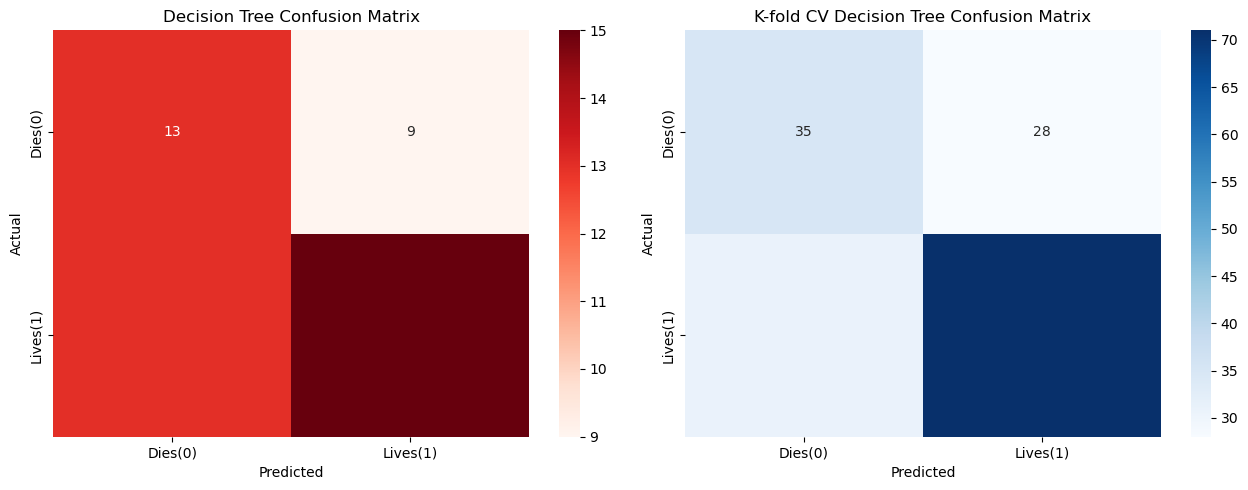

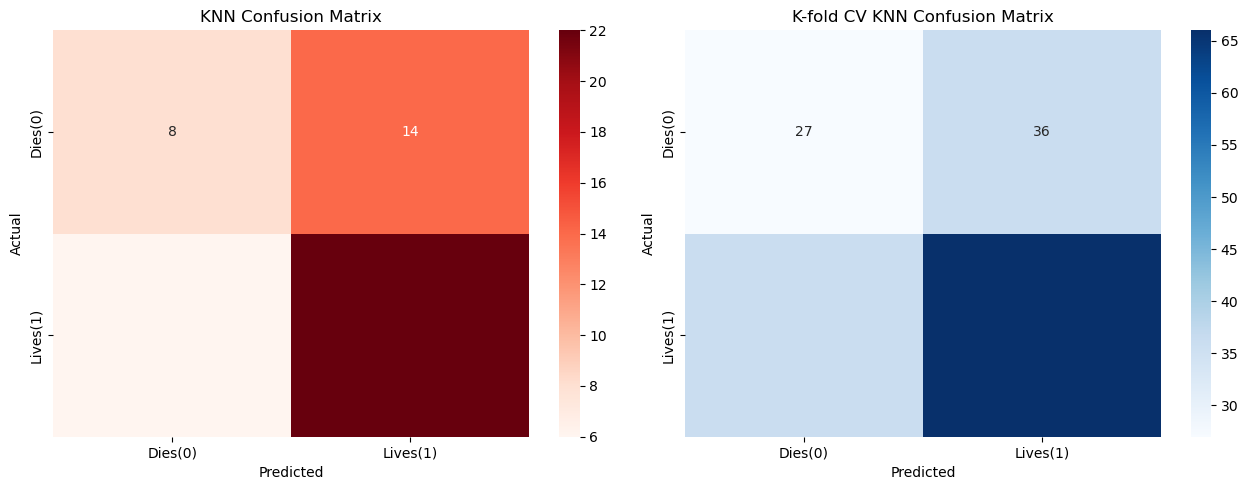

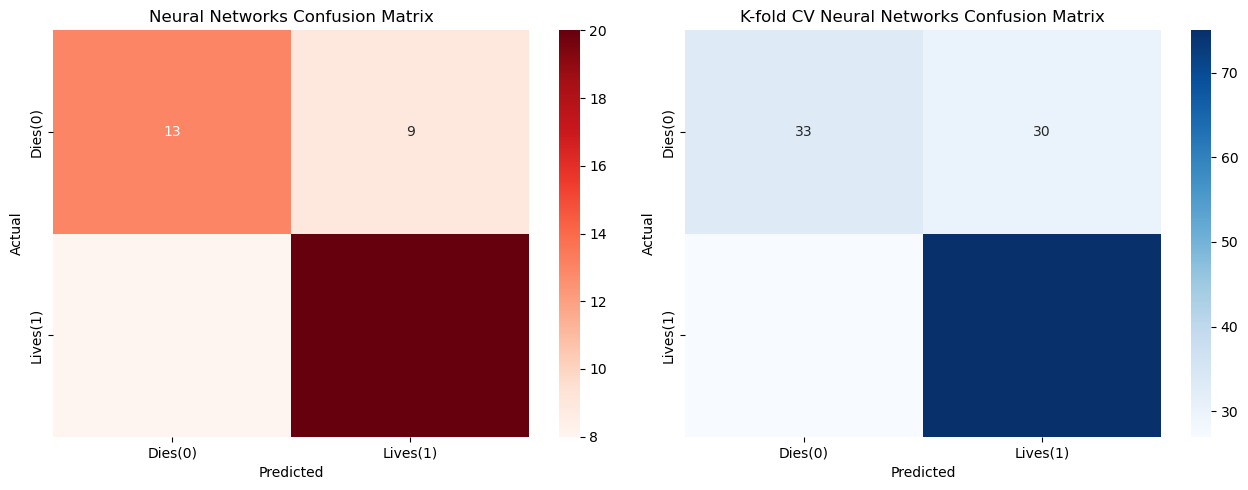

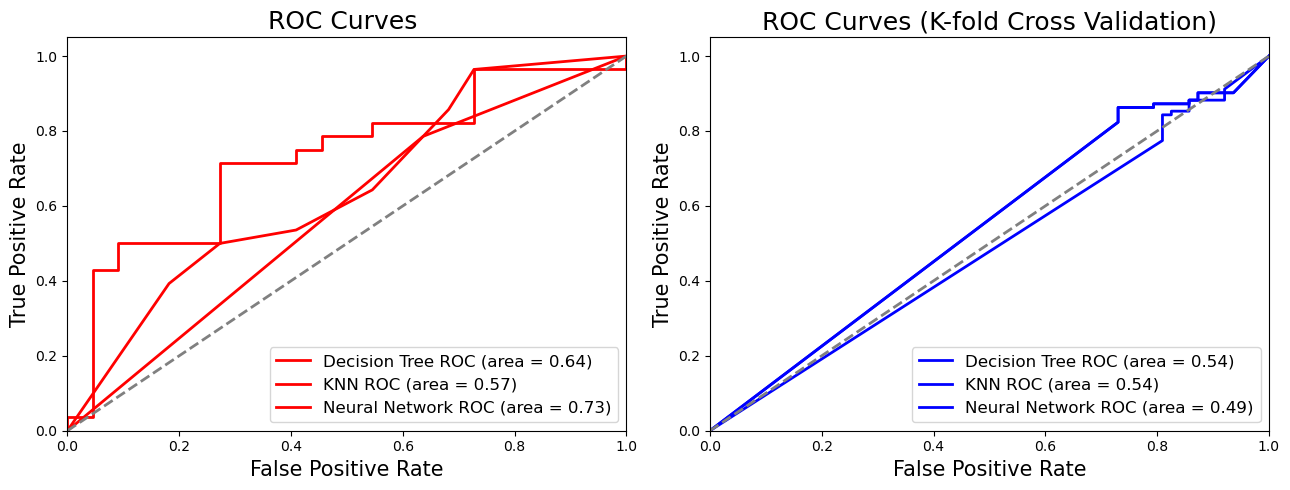

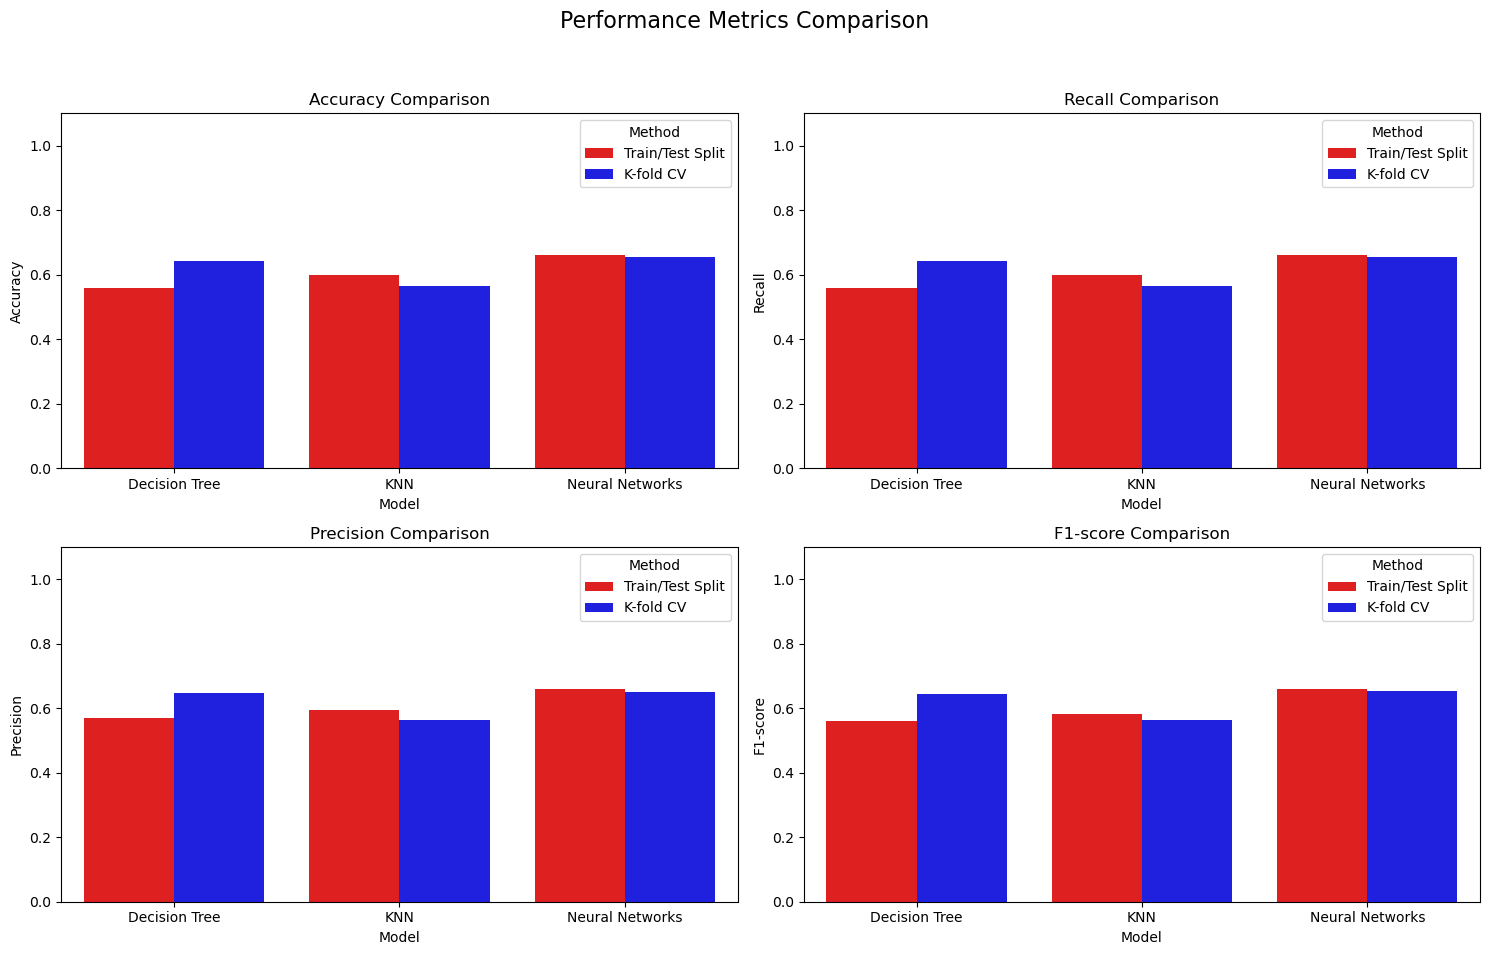

In [1098]:
xticks = ['Dies(0)', 'Lives(1)']
yticks = ['Dies(0)', 'Lives(1)']
plot_confusion_matrices(conf_matrix_tree, conf_matrix_cv_tree, 'Decision Tree Confusion Matrix', 'K-fold CV Decision Tree Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(conf_matrix_knn, conf_matrix_cv_knn, 'KNN Confusion Matrix', 'K-fold CV KNN Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(conf_matrix_nn, conf_matrix_cv_nn, 'Neural Networks Confusion Matrix', 'K-fold CV Neural Networks Confusion Matrix', 'Reds', 'Blues', xticks, yticks)

fpr = {'tree': fpr_tree, 'knn': fpr_knn, 'nn': fpr_nn}
tpr = {'tree': tpr_tree, 'knn': tpr_knn, 'nn': tpr_nn}
roc_auc = {'tree': roc_auc_tree, 'knn': roc_auc_knn, 'nn': roc_auc_nn}

cv_fpr = {'tree': fpr_cv_tree, 'knn': fpr_cv_knn, 'nn': fpr_cv_nn}
cv_tpr = {'tree': tpr_cv_tree, 'knn': tpr_cv_knn, 'nn': tpr_cv_nn}
cv_roc_auc = {'tree': roc_auc_cv_tree, 'knn': roc_auc_cv_knn, 'nn': roc_auc_cv_nn}

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot_roc_curve(axes[0], fpr, tpr, roc_auc, 'ROC Curves ', 'red')
plot_roc_curve(axes[1], cv_fpr, cv_tpr, cv_roc_auc, 'ROC Curves (K-fold Cross Validation)', 'blue')
plt.tight_layout()
plt.show()

# Métricas de accuracy, recall, precision e F1-score para cada modelo e método
metrics = {
    'Model': ['Decision Tree', 'Decision Tree', 'KNN', 'KNN', 'Neural Networks', 'Neural Networks'],
    'Method': ['Train/Test Split', 'K-fold CV', 'Train/Test Split', 'K-fold CV', 'Train/Test Split', 'K-fold CV'],
    'Class': [0, 1, 0, 1, 0, 1],
    'Accuracy': [accuracy_tree,accuracy_cv_tree,accuracy_knn,accuracy_cv_knn,accuracy_nn,accuracy_cv_nn],
    'Recall': [tree_recall, cv_tree_recall,knn_recall,cv_knn_recall, nn_recall, cv_nn_recall],
    'Precision': [tree_precision,cv_tree_precision, knn_precision,cv_knn_precision, nn_precision, cv_nn_precision],
    'F1-score': [tree_f1,cv_tree_f1, knn_f1,cv_knn_f1,nn_f1,cv_nn_f1]
}
df_metrics = pd.DataFrame(metrics)
palette = {'Train/Test Split': 'red', 'K-fold CV': 'blue'}
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Metrics Comparison', fontsize=16)

metrics_list = ['Accuracy', 'Recall', 'Precision', 'F1-score']
titles = ['Accuracy Comparison', 'Recall Comparison', 'Precision Comparison', 'F1-score Comparison']
for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, hue='Method', data=df_metrics, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(titles[i])
    axes[i//2, i%2].set_ylim([0, 1.1])
    axes[i//2, i%2].set_ylabel(metric)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ainda que o Cross Validation apresente uma accuracy muito semelhante aos outros, através da matriz de confusão podemos perceber que não é o melhor modelo (número superior de Falsos Positivos). Destacou-se a duração de tempo superior desta técnica para o modelo Neural Networks.

Ao remover variáveis com um elevado nível de correlação e com um baixo nível de importância verifica-se que obtemos os resultados não se alteram significativamente.
 Quais parâmetros então é que serão impactantes? Vamos testar agora apenas com as colunas numéricas.

<font size="6">Teste 4

<font size="4">

Testar com as colunas que apenas contêm valores numéricos

In [1099]:
#Selecionar as primeiras 23 colunas
selected_columns1 = data.columns[0:23]
selected_columns2 = data.columns[26:29]

#Armazenar os nomes dessas colunas em uma lista
column_names = list(selected_columns1) + list(selected_columns2)

# Selecting the features and the label
X = data_media_moda.drop(column_names, axis=1)  # Features
y = data['Class']  # Label

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<font size="5">Decision Tree 

In [1100]:
#cria o modelo Decision Tree
tree=DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

#treina o modelo
tree.fit(X_train, y_train)

# Testing the classifier, faz as previsões
y_pred = tree.predict(X_test)

tree_recall= recall_score(y_test, y_pred, average='weighted')
tree_f1 = f1_score(y_test, y_pred, average='weighted')
tree_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_tree = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = tree.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_tree = auc(fpr_tree, tpr_tree)
report_tree = classification_report(y_test, y_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



<font size="5">KNN

In [1101]:
# Convertendo para NumPy Arrays explicitamente
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Cria o modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)  # Exemplo com k=5, você pode ajustar conforme necessário

# Treina o modelo
knn.fit(X_train, y_train)

# Faz previsões
y_pred = knn.predict(X_test)

knn_recall= recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.62      0.36      0.46        22
           1       0.62      0.82      0.71        28

    accuracy                           0.62        50
   macro avg       0.62      0.59      0.58        50
weighted avg       0.62      0.62      0.60        50



<font size="5">Neural Networks

In [1102]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)
# Fazer previsões
y_pred = mlp.predict(X_test)

nn_recall= recall_score(y_test, y_pred, average='weighted')
nn_f1 = f1_score(y_test, y_pred, average='weighted')
nn_precision= precision_score(y_test, y_pred, average='weighted')

#Accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
# Gerar a matriz de confusão
conf_matrix_nn = confusion_matrix(y_test, y_pred)
# Fazer previsões de probabilidade no conjunto de teste
y_prob = mlp.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr_nn, tpr_nn, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC
roc_auc_nn = auc(fpr_nn, tpr_nn)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.93      0.96      0.95        28

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [1103]:
#Selecionar as primeiras 23 colunas
selected_columns1 = data.columns[0:23]
selected_columns2 = data.columns[26:29]

#Armazenar os nomes dessas colunas em uma lista
column_names = list(selected_columns1) + list(selected_columns2)

# Selecting the features and the label
X = data_knn.drop(column_names, axis=1)  # Features
y = data['Class']  # Label

<font size="5">K-fold Cross Validation Decision Tree

In [1104]:
# Convertendo para arrays numpy
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Modelo Decision Tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando o K-fold cross-validation
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree.fit(X_train, y_train)
    y_pred.extend(tree.predict(X_test))
    y_true.extend(y_test)

# Calculando o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_tree = accuracy_score(y_true, y_pred)
cv_tree_recall = recall_score(y_true, y_pred, average='weighted')
cv_tree_precision = precision_score(y_true, y_pred, average='weighted')
cv_tree_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_tree = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_tree, tpr_cv_tree, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_tree = auc(fpr_cv_tree, tpr_cv_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       102

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



ValueError: X has 22 features, but MLPClassifier is expecting 24 features as input.

<font size="5">K-fold Cross-validation KNN

In [ ]:
# Convertendo para arrays numpy
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Calculando e imprimindo o relatório de classificação
y_true = []
y_pred = []
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred.extend(knn.predict(X_test))
    y_true.extend(y_test)

# Calculando o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_knn = accuracy_score(y_true, y_pred)
cv_knn_recall = recall_score(y_true, y_pred, average='weighted')
cv_knn_precision = precision_score(y_true, y_pred, average='weighted')
cv_knn_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_knn = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_knn, tpr_cv_knn, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_knn = auc(fpr_cv_knn, tpr_cv_knn)

<font size="5">K-fold Cross-validation Neural Networks

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600, random_state=42)
mlp.fit(X_train, y_train)

# Definindo o k-fold CV
k = 5  # Vamos usar k=5 para este exemplo
k_fold = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para armazenar rótulos verdadeiros e predições
y_true = []
y_pred = []

# Executando a validação cruzada Leave-One-Out
for train_index, test_index in loo.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    
    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Treinar o modelo
    mlp.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred.append(mlp.predict(X_test)[0])
    y_true.append(y_test[0])

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_true, y_pred))

# Calculando métricas adicionais
accuracy_cv_nn = accuracy_score(y_true, y_pred)
cv_nn_recall = recall_score(y_true, y_pred, average='weighted')
cv_nn_precision = precision_score(y_true, y_pred, average='weighted')
cv_nn_f1 = f1_score(y_true, y_pred, average='weighted')

# Gerar a matriz de confusão
conf_matrix_cv_nn = confusion_matrix(y_true, y_pred)

# Calculando a curva ROC e a AUC
y_prob = mlp.predict_proba(X_np)[:, 1]
fpr_cv_nn, tpr_cv_nn, thresholds = roc_curve(y_true, y_prob)
roc_auc_cv_nn = auc(fpr_cv_nn, tpr_cv_nn)

<font size="5">Comparação de resultados

In [ ]:
xticks = ['Dies(0)', 'Lives(1)']
yticks = ['Dies(0)', 'Lives(1)']
plot_confusion_matrices(conf_matrix_tree, conf_matrix_cv_tree, 'Decision Tree Confusion Matrix', 'K-fold CV Decision Tree Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(conf_matrix_knn, conf_matrix_cv_knn, 'KNN Confusion Matrix', 'K-fold CV KNN Confusion Matrix', 'Reds', 'Blues', xticks, yticks)
plot_confusion_matrices(conf_matrix_nn, conf_matrix_cv_nn, 'Neural Networks Confusion Matrix', 'K-fold CV Neural Networks Confusion Matrix', 'Reds', 'Blues', xticks, yticks)

fpr = {'tree': fpr_tree, 'knn': fpr_knn, 'nn': fpr_nn}
tpr = {'tree': tpr_tree, 'knn': tpr_knn, 'nn': tpr_nn}
roc_auc = {'tree': roc_auc_tree, 'knn': roc_auc_knn, 'nn': roc_auc_nn}

cv_fpr = {'tree': fpr_cv_tree, 'knn': fpr_cv_knn, 'nn': fpr_cv_nn}
cv_tpr = {'tree': tpr_cv_tree, 'knn': tpr_cv_knn, 'nn': tpr_cv_nn}
cv_roc_auc = {'tree': roc_auc_cv_tree, 'knn': roc_auc_cv_knn, 'nn': roc_auc_cv_nn}

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot_roc_curve(axes[0], fpr, tpr, roc_auc, 'ROC Curves ', 'red')
plot_roc_curve(axes[1], cv_fpr, cv_tpr, cv_roc_auc, 'ROC Curves (K-fold Cross Validation)', 'blue')
plt.tight_layout()
plt.show()

# Métricas de accuracy, recall, precision e F1-score para cada modelo e método
metrics = {
    'Model': ['Decision Tree', 'Decision Tree', 'KNN', 'KNN', 'Neural Networks', 'Neural Networks'],
    'Method': ['Train/Test Split', 'K-fold CV', 'Train/Test Split', 'K-fold CV', 'Train/Test Split', 'K-fold CV'],
    'Class': [0, 1, 0, 1, 0, 1],
    'Accuracy': [accuracy_tree,accuracy_cv_tree,accuracy_knn,accuracy_cv_knn,accuracy_nn,accuracy_cv_nn],
    'Recall': [tree_recall, cv_tree_recall,knn_recall,cv_knn_recall, nn_recall, cv_nn_recall],
    'Precision': [tree_precision,cv_tree_precision, knn_precision,cv_knn_precision, nn_precision, cv_nn_precision],
    'F1-score': [tree_f1,cv_tree_f1, knn_f1,cv_knn_f1,nn_f1,cv_nn_f1]
}
df_metrics = pd.DataFrame(metrics)
palette = {'Train/Test Split': 'red', 'K-fold CV': 'blue'}
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance Metrics Comparison', fontsize=16)

metrics_list = ['Accuracy', 'Recall', 'Precision', 'F1-score']
titles = ['Accuracy Comparison', 'Recall Comparison', 'Precision Comparison', 'F1-score Comparison']
for i, metric in enumerate(metrics_list):
    sns.barplot(x='Model', y=metric, hue='Method', data=df_metrics, ax=axes[i//2, i%2], palette=palette)
    axes[i//2, i%2].set_title(titles[i])
    axes[i//2, i%2].set_ylim([0, 1.1])
    axes[i//2, i%2].set_ylabel(metric)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Observa-se uma eficaz performance com uma elevada accuracy no modelo Neural Networks, contudo, o número de Falsos Positivos(31) é demasiado alto para que este seja considerado o melhor, dao que este parâmetro impacta bastante na qualidade da previsão.

<font size="6"> Hiperparâmetros

A partir da observação dos gráficos em todos os testes, concluímos que o modelo com melhor accuracy e performance até ao momento foi o Neural Networks no Teste 2 com uma acuracy de 72% e um valor de Falsos Positivos igual a 10. Vamos agora ajustar os parâmetros testando se é possível alcançar valores melhores.

In [ ]:
# Definir o pipeline com escalonamento e classificador MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=600, random_state=42))
])

# Definir os parâmetros que deseja testar
parameters = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (200,)],  # Testar diferentes tamanhos de camadas ocultas
    'mlp__alpha': [0.0001, 0.001, 0.01],  # Testar diferentes valores de regularização
}

# Definir métricas para otimização
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall_weighted',
    'precision': 'precision_weighted',
    'f1': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring=scoring, refit='accuracy',cv=5, verbose=1, n_jobs=-1)

# Treinar o modelo com Grid Search
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhor combinação de hiperparâmetros:")
print(grid_search.best_params_)
print()

# Métricas de desempenho para o melhor modelo
print("Métricas de desempenho para o melhor modelo:")
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precisão:", precision_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
y_prob = grid_search.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_prob))
print()

conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Dies(0)', 'Lives(1)']

# Cria o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Adiciona rótulos e título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Mostra o plot
plt.show()

# Relatório de classificação
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)
print()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


<font size="6"> Visualização do Grid Search - Interação dos parâmetros

In [ ]:
# Gerar um conjunto de dados fictício para o exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Definir o pipeline com escalonamento e classificador MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=600, random_state=42))
])

# Definir os parâmetros que deseja testar
parameters = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (200,)],  # Testar diferentes tamanhos de camadas ocultas
    'mlp__alpha': [0.0001, 0.001, 0.01],  # Testar diferentes valores de regularização
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=parameters, scoring='accuracy',
                           cv=5, verbose=1, n_jobs=-1)

# Treinar o modelo com Grid Search
grid_search.fit(X, y)

# Extração dos resultados do Grid Search para um DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Ajustar o shape do grid de resultados
param_grid_shape = [len(v) for v in grid_search.param_grid.values()]
grid_visualization = results['mean_test_score'].values.reshape(param_grid_shape)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(grid_visualization, cmap='Blues', annot=True, cbar=True, fmt='.3f')

# Configurações dos eixos
plt.xticks(np.arange(param_grid_shape[1]) + 0.5, parameters['mlp__alpha'])
plt.yticks(np.arange(param_grid_shape[0]) + 0.5, [str(x) for x in parameters['mlp__hidden_layer_sizes']])
plt.xlabel('Alpha')
plt.ylabel('Hidden Layer Sizes')
plt.title('Grid Search Results - MLPClassifier')

plt.tight_layout()
plt.show()


<font size="6">Conclusão

Ao longo dos testes realizados, foram avaliados vários parâmetros, entre os quais, não se detetaram grandes diferenças. A acurácia dos modelos variou no geral entre 0,60 tanto com a árvore de decisão como com o KNN. O modelo Neural Networks alcançou a melhor performance no teste 2 com um nível de acurácia de 0,72 após a remoção das colunas que apresentam valores em falta. Para além da acurácia, uma questão que contém um grande peso na escolha do melhor modelo é a quantidade de Falsos Positivos, uma vez que está a ser realizada uma previsão médica a gravidade deste aspeto tem de ser salientada.

As técnicas de partição os dados testados Leave One Out e Cross Validation testados também não se destacaram entre os testes.

Os dados foram modificados em cada teste através de diferentes técnicas de substituição, remoção de "features", comparação da importância, correlação e tipo das variáveis.

Finalmente, foi utilizada a técnica Grid Search para ajustar os parâmetros e otimizar o modelo Neural  Networks alcançando uma acurácia de 0,92.

A análise profunda dos dados e os diversos testes e experimentações permitiram-nos alcançar o modelo mais adequado e com melhor desempenho para o problema nomeado